Example of overlap analysis between multi-domain and one-domain experiments

In [9]:
from constants import *
import pandas as pd

Uncomment next cell if you want to process your own experimental results

In [10]:
# PATH_RESULTS = './results_test/'

In [11]:
DATA_NAME = '1_[res]_[sus, delayedSus]/'
EXPERIMENTS = [['spleen', 'liver'], ['spleen'], ['liver']]
rootDir = PATH_RESULTS + DATA_NAME
dataName1, dataName2, dataName3 = 'all', 'spleen', 'liver'

Process and plot overlap distributions

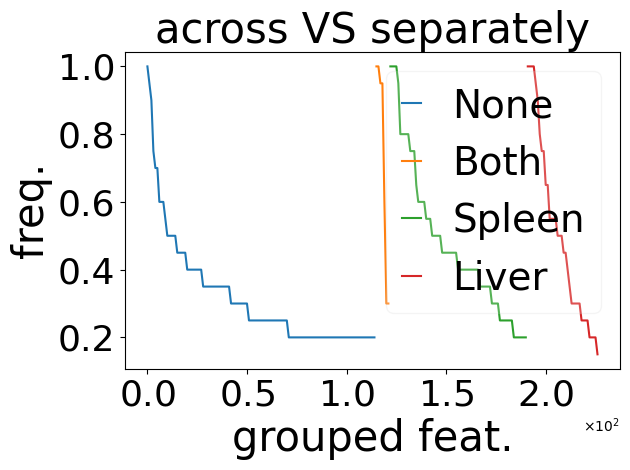

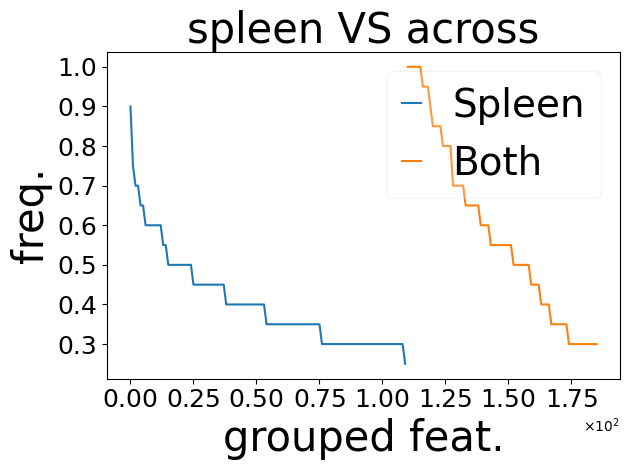

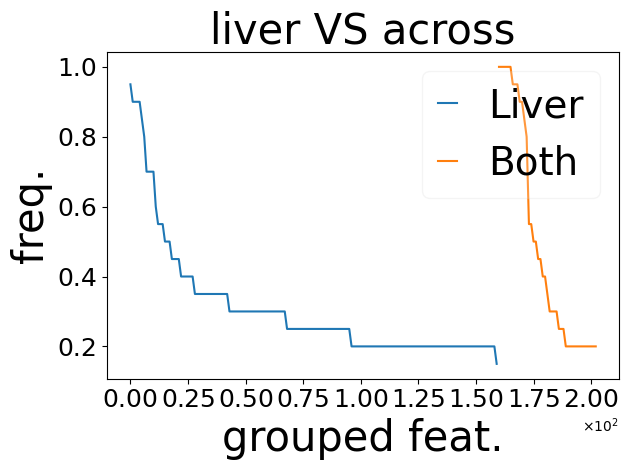

In [12]:
genes1 = pd.read_csv(rootDir + dataName1 + "/genesFreqExtr2.txt", sep=',', header=(0))
genes2 = pd.read_csv(rootDir + dataName2 + "/genesFreqExtr2.txt", sep=',', header=(0))
genes3 = pd.read_csv(rootDir + dataName3 + "/genesFreqExtr2.txt", sep=',', header=(0))


New = [_ for _ in genes1['genes'].to_list() if ( _ not in genes2['genes'].to_list() and not _ in genes3['genes'].to_list())]
Both = [_ for _ in genes1['genes'].to_list() if ( _ in genes2['genes'].to_list() and _ in genes3['genes'].to_list())]
Overlap2 = [_ for _ in genes1['genes'].to_list() if ( _ in genes2['genes'].to_list() and _ not in genes3['genes'].to_list())]
Overlap3 = [_ for _ in genes1['genes'].to_list() if ( _ not in genes2['genes'].to_list() and _ in genes3['genes'].to_list())]

assert len(New) + len(Both) + len(Overlap2) + len(Overlap3) == len(genes1['genes'].to_list())

weights = [genes1[genes1['genes'].isin(_)]['weights'] for _ in [New, Both, Overlap2, Overlap3]]
labels = ['None', 'Both', 'Spleen', 'Liver']

import matplotlib.pyplot as plt
plt.figure()
start = 0
for _1 in range(4):
    plt.plot([_2 + start for _2 in range(len(weights[_1]))], weights[_1].values, label = labels[_1])
    start += len(weights[_1])
plt.title("across VS separately", fontsize=30)
plt.legend(fontsize=28, framealpha=0.2, handlelength=.5, loc='upper right')
plt.ylabel('freq.', fontsize=30)
plt.xlabel('grouped feat.', fontsize=30)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0), useMathText = True)
plt.tight_layout()
plt.savefig(rootDir + dataName1 + '/groupped.png')
plt.show()

New = [_ for _ in genes2['genes'].to_list() if _ not in genes1['genes'].to_list()]
Both = [_ for _ in genes2['genes'].to_list() if _ in genes1['genes'].to_list()]
assert len(New) + len(Both) == len(genes2['genes'].to_list())

weights = [genes2[genes2['genes'].isin(_)]['weights'] for _ in [New, Both]]
labels = ['Spleen', 'Both']
plt.figure()

start = 0
for _1 in range(2):
    plt.plot([_2 + start for _2 in range(len(weights[_1]))], weights[_1].values, label = labels[_1])
    start += len(weights[_1])
plt.title("spleen VS across", fontsize=30)
plt.legend(fontsize=28, framealpha=0.2, handlelength=.5, loc='upper right')
# plt.xticks(rotation=45, ha='right')
plt.ylabel('freq.', fontsize=30)
plt.xlabel('grouped feat.', fontsize=30)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0), useMathText = True)
plt.tight_layout()
plt.savefig(rootDir + dataName2 + '/grouppedSpleenSmall.png')
plt.show()

New = [_ for _ in genes3['genes'].to_list() if _ not in genes1['genes'].to_list()]
Both = [_ for _ in genes3['genes'].to_list() if _ in genes1['genes'].to_list()]
assert len(New) + len(Both) == len(genes3['genes'].to_list())

weights = [genes3[genes3['genes'].isin(_)]['weights'] for _ in [New, Both]]
labels = ['Liver', 'Both']

plt.figure()
start = 0
for _1 in range(2):
    plt.plot([_2 + start for _2 in range(len(weights[_1]))], weights[_1].values, label = labels[_1])
    start += len(weights[_1])
plt.title("liver VS across", fontsize=30)
plt.legend(fontsize=28, framealpha=0.2, handlelength=.5, loc='upper right')
# plt.xticks(rotation=45, ha='right')
plt.ylabel('freq.', fontsize=30)
plt.xlabel('grouped feat.', fontsize=30)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0), useMathText = True)
plt.tight_layout()
plt.savefig(rootDir + dataName3 + '/grouppedLiverSmall.png')
plt.show()